In [ ]:
!pip install opendatasets

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/shayanfazeli/heartbeat/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amrt19
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat


100%|██████████| 98.8M/98.8M [00:00<00:00, 1.18GB/s]

In [ ]:
import pandas as pd
train = pd.read_csv('heartbeat/mitbih_train.csv', header=None)
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
test = pd.read_csv('heartbeat/mitbih_test.csv', header=None)
test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
train.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


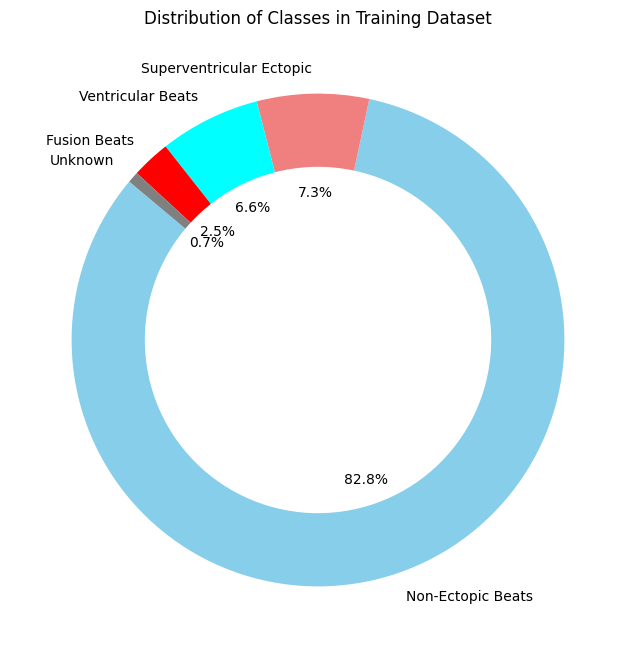

In [ ]:
class_counts = train.iloc[:, -1].value_counts()
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(class_counts, labels=['Non-Ectopic Beats', 'Superventricular Ectopic', 'Ventricular Beats',
                              'Fusion Beats', 'Unknown'],
        colors=['skyblue', 'lightcoral', 'cyan', 'red', 'grey'], autopct='%1.1f%%', startangle=140)
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Distribution of Classes in Training Dataset')
plt.show()

In [ ]:
##  df_0 → all rows where label = 1 (Non-Ectopic Beats)
##  df_1 → all rows where label = 2 (SuperVentricular Ectopic Beats)  etc...
df_1 = train[train[187] == 1]
df_2 = train[train[187] == 2]
df_3 = train[train[187] == 3]
df_4 = train[train[187] == 4]
df_0 = train[train[187] == 0].sample(n=20000, random_state=123)## take a 20k sample

In [ ]:
#upsample so we make a all class 20k rows by duplicating them since cnn is bad if a certain class is dominating
df_1_upsample = resample(df_1, n_samples=20000, replace=True, random_state=123)
df_2_upsample = resample(df_2, n_samples=20000, replace=True, random_state=123)
df_3_upsample = resample(df_3, n_samples=20000, replace=True, random_state=123)
df_4_upsample = resample(df_4, n_samples=20000, replace=True, random_state=123)

## concatinating all the data after upsampling them
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
c=train_df[187].value_counts()
c

,count
187,
0.0,20000
1.0,20000
2.0,20000
3.0,20000
4.0,20000


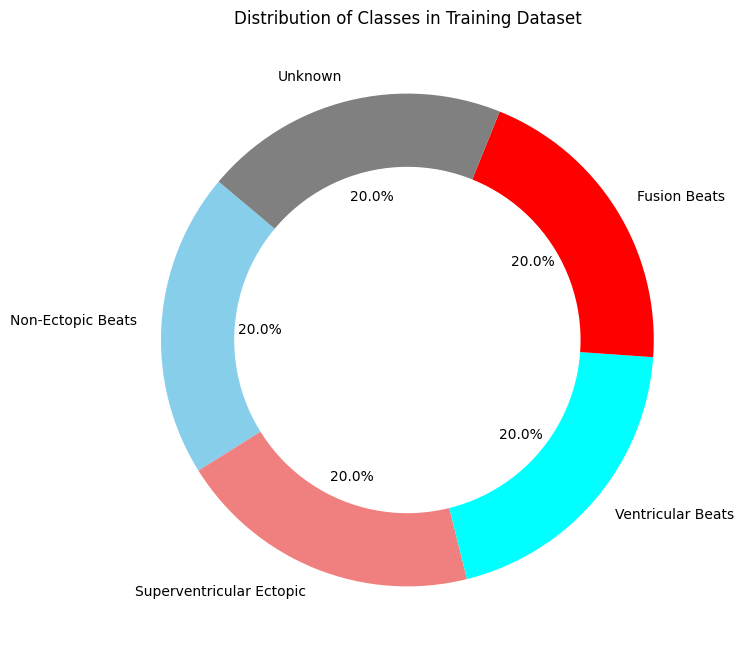

In [ ]:
## Doing the pie chart again after upsampling the data
class_counts = train_df.iloc[:, -1].value_counts()
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(class_counts, labels=['Non-Ectopic Beats', 'Superventricular Ectopic', 'Ventricular Beats',
                              'Fusion Beats', 'Unknown'],
        colors=['skyblue', 'lightcoral', 'cyan', 'red', 'grey'], autopct='%1.1f%%', startangle=140)
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Distribution of Classes in Training Dataset')
plt.show()

In [ ]:
# First, split the original training data into training and validation sets
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Now, apply upsampling only to the *original* training data (X_train_orig, y_train_orig)
df_train_orig = pd.concat([X_train_orig, y_train_orig], axis=1)

df_0_train = df_train_orig[df_train_orig[187] == 0].sample(n=int(len(df_train_orig[df_train_orig[187]==0])*0.5), random_state=123) # Downsample Class 0
df_1_train_upsample = resample(df_train_orig[df_train_orig[187] == 1], n_samples=20000, replace=True, random_state=123)
df_2_train_upsample = resample(df_train_orig[df_train_orig[187] == 2], n_samples=20000, replace=True, random_state=123)
df_3_train_upsample = resample(df_train_orig[df_train_orig[187] == 3], n_samples=20000, replace=True, random_state=123)
df_4_train_upsample = resample(df_train_orig[df_train_orig[187] == 4], n_samples=20000, replace=True, random_state=123)

train_df_resampled = pd.concat([df_0_train, df_1_train_upsample, df_2_train_upsample, df_3_train_upsample, df_4_train_upsample])

X_train_resampled = train_df_resampled.iloc[:, :-1]
y_train_resampled = train_df_resampled.iloc[:, -1]

# Keep the original validation data as is
X_val = X_val_orig
y_val = y_val_orig

# Prepare test data
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [ ]:
# Function to add random noise to a sample
def add_noise(sample, noise_level=0.01):
    return sample + np.random.normal(0, noise_level, size=sample.shape)

# Function to scale a sample
def scale_sample(sample, scale_factor=0.1):
    scale = 1.0 + np.random.normal(0, scale_factor, size=1)
    return sample * scale

# Function to shift a sample horizontally
def shift_sample(sample, shift_range=10):
    shift = np.random.randint(-shift_range, shift_range)
    return np.roll(sample, shift)

# Apply data augmentation to the resampled training data
X_train_augmented = []
y_train_augmented = []

for i in range(len(X_train_resampled)):
    sample = X_train_resampled.iloc[i].values
    label = y_train_resampled.iloc[i]

    # Add original sample
    X_train_augmented.append(sample)
    y_train_augmented.append(label)

    # Apply augmentation techniques
    noisy_sample = add_noise(sample)
    scaled_sample = scale_sample(sample)
    shifted_sample = shift_sample(sample)

    X_train_augmented.append(noisy_sample)
    y_train_augmented.append(label)
    X_train_augmented.append(scaled_sample)
    y_train_augmented.append(label)
    X_train_augmented.append(shifted_sample)
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print("Original training data shape:", X_train_resampled.shape)
print("Augmented training data shape:", X_train_augmented.shape)

Original training data shape: (108988, 187)
Augmented training data shape: (435952, 187)


In [ ]:
# Define the training and testing sets
X_train = X_train_resampled
y_train = y_train_resampled
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=123)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.81      0.78      0.79       556
         2.0       0.94      0.94      0.94      1448
         3.0       0.77      0.78      0.78       162
         4.0       0.98      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.90      0.89      0.90     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model for binary classification
xgb_binary_model = xgb.XGBClassifier(objective='binary:logistic', random_state=123)
xgb_binary_model.fit(X_train_binary_resampled, y_train_binary_resampled)

# Make predictions on the binary test set
y_pred_xgb_binary = xgb_binary_model.predict(X_test_binary)

# Evaluate the binary model
print("XGBoost Classifier Report (Binary):")
print(classification_report(y_test_binary, y_pred_xgb_binary))


XGBoost Classifier Report (Binary):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.95      0.94      0.94      3774

    accuracy                           0.98     21892
   macro avg       0.97      0.96      0.97     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Prepare data for binary classification: 0 for Normal, 1 for Abnormal
train_binary = train.copy()
test_binary = test.copy()

train_binary[187] = train_binary[187].apply(lambda x: 0 if x == 0 else 1)
test_binary[187] = test_binary[187].apply(lambda x: 0 if x == 0 else 1)

# Check the distribution of classes in the binary training data
print("Binary Class Distribution in Training Data:")
print(train_binary[187].value_counts())

# Prepare features and labels for binary classification
X_train_binary = train_binary.iloc[:, :-1]
y_train_binary = train_binary.iloc[:, -1]
X_test_binary = test_binary.iloc[:, :-1]
y_test_binary = test_binary.iloc[:, -1]

# Since the data is still imbalanced, let's resample the training data for binary classification
df_0_binary = train_binary[train_binary[187] == 0]
df_1_binary = train_binary[train_binary[187] == 1]

# Upsample the minority class (Abnormal)
df_1_binary_upsampled = resample(df_1_binary, n_samples=len(df_0_binary), replace=True, random_state=123)

# Combine the majority class (Normal) with the upsampled minority class
train_binary_resampled = pd.concat([df_0_binary, df_1_binary_upsampled])

X_train_binary_resampled = train_binary_resampled.iloc[:, :-1]
y_train_binary_resampled = train_binary_resampled.iloc[:, -1]

print("\nBinary Class Distribution in Resampled Training Data:")
print(train_binary_resampled[187].value_counts())

# Apply Random Forest model for binary classification
rf_binary_model = RandomForestClassifier(n_estimators=100, random_state=123, n_jobs=-1)
rf_binary_model.fit(X_train_binary_resampled, y_train_binary_resampled)

# Make predictions on the binary test set
y_pred_rf_binary = rf_binary_model.predict(X_test_binary)

# Evaluate the binary model
print("\nRandom Forest Classifier Report (Binary):")
print(classification_report(y_test_binary, y_pred_rf_binary))

Binary Class Distribution in Training Data:
187
0    72471
1    15083
Name: count, dtype: int64

Binary Class Distribution in Resampled Training Data:
187
0    72471
1    72471
Name: count, dtype: int64

Random Forest Classifier Report (Binary):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.99      0.90      0.94      3774

    accuracy                           0.98     21892
   macro avg       0.98      0.95      0.96     21892
weighted avg       0.98      0.98      0.98     21892



In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for Random Forest Binary Classifier
try:
    # If the model supports predict_proba, use probabilities for AUC
    y_pred_rf_binary_proba = rf_binary_model.predict_proba(X_test_binary)[:, 1]
    auc_rf_binary = roc_auc_score(y_test_binary, y_pred_rf_binary_proba)
    print(f"AUC for Random Forest Binary Classifier: {auc_rf_binary:.4f}")
except AttributeError:
    # If not, use predicted labels
    auc_rf_binary = roc_auc_score(y_test_binary, y_pred_rf_binary)
    print(f"AUC for Random Forest Binary Classifier (using predicted labels): {auc_rf_binary:.4f}")


# Calculate AUC for XGBoost Binary Classifier
try:
    # If the model supports predict_proba, use probabilities for AUC
    y_pred_xgb_binary_proba = xgb_binary_model.predict_proba(X_test_binary)[:, 1]
    auc_xgb_binary = roc_auc_score(y_test_binary, y_pred_xgb_binary_proba)
    print(f"AUC for XGBoost Binary Classifier: {auc_xgb_binary:.4f}")
except AttributeError:
     # If not, use predicted labels
    auc_xgb_binary = roc_auc_score(y_test_binary, y_pred_xgb_binary)
    print(f"AUC for XGBoost Binary Classifier (using predicted labels): {auc_xgb_binary:.4f}")

AUC for Random Forest Binary Classifier: 0.9948
AUC for XGBoost Binary Classifier: 0.9919


In [ ]:

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model for binary classification
dt_binary_model = DecisionTreeClassifier(random_state=123)
dt_binary_model.fit(X_train_binary_resampled, y_train_binary_resampled)

# Make predictions on the binary test set
y_pred_dt_binary = dt_binary_model.predict(X_test_binary)

# Evaluate the binary model
print("Decision Tree Classifier Report (Binary):")
print(classification_report(y_test_binary, y_pred_dt_binary))

Decision Tree Classifier Report (Binary):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18118
           1       0.88      0.88      0.88      3774

    accuracy                           0.96     21892
   macro avg       0.93      0.93      0.93     21892
weighted avg       0.96      0.96      0.96     21892



In [ ]:
# Reshape data for CNN (add a channel dimension)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:")
print(class_weight_dict)

Class Weights:
{0: np.float64(0.7519525320822409), 1: np.float64(1.08988), 2: np.float64(1.08988), 3: np.float64(1.08988), 4: np.float64(1.08988)}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1. Filter data for abnormal classes
# ================================
abnormal_classes = [1, 2, 3, 4]

X_train_abnormal = X_train[y_train.isin(abnormal_classes)]
y_train_abnormal = y_train[y_train.isin(abnormal_classes)]

X_val_abnormal = X_val[y_val.isin(abnormal_classes)]
y_val_abnormal = y_val[y_val.isin(abnormal_classes)]

X_test_abnormal = X_test[y_test.isin(abnormal_classes)]
y_test_abnormal = y_test[y_test.isin(abnormal_classes)]

# ================================
# 2. Rescale + reshape
# ================================
X_train_abnormal_scaled = scaler.transform(X_train_abnormal)
X_val_abnormal_scaled = scaler.transform(X_val_abnormal)
X_test_abnormal_scaled = scaler.transform(X_test_abnormal)

X_train_abnormal_cnn = X_train_abnormal_scaled.reshape(X_train_abnormal_scaled.shape[0],
                                                       X_train_abnormal_scaled.shape[1], 1)
X_val_abnormal_cnn = X_val_abnormal_scaled.reshape(X_val_abnormal_scaled.shape[0],
                                                   X_val_abnormal_scaled.shape[1], 1)
X_test_abnormal_cnn = X_test_abnormal_scaled.reshape(X_test_abnormal_scaled.shape[0],
                                                     X_test_abnormal_scaled.shape[1], 1)

# ================================
# 3. Remap labels [1,2,3,4] → [0,1,2,3]
# ================================
class_mapping = {1:0, 2:1, 3:2, 4:3}
y_train_abnormal = y_train_abnormal.map(class_mapping)
y_val_abnormal = y_val_abnormal.map(class_mapping)
y_test_abnormal = y_test_abnormal.map(class_mapping)

# ================================
# 4. Compute class weights
# ================================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_abnormal),
    y=y_train_abnormal
)
class_weight_dict = dict(enumerate(class_weights))

# ================================
# 5. Define CNN model
# ================================
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train_abnormal_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(4, activation='softmax')  # 4 abnormal classes
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# ================================
# 6. Callbacks
# ================================
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-5,
    verbose=1
)

# ================================
# 7. Train model
# ================================
history_cnn = cnn_model.fit(
    X_train_abnormal_cnn, y_train_abnormal,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_abnormal_cnn, y_val_abnormal),
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 101s 39ms/step - accuracy: 0.8844 - loss: 0.3473 - val_accuracy: 0.9635 - val_loss: 0.1192 - learning_rate: 0.0010
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 141s 39ms/step - accuracy: 0.9587 - loss: 0.1217 - val_accuracy: 0.9722 - val_loss: 0.0865 - learning_rate: 0.0010
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - accuracy: 0.9731 - loss: 0.0846 - val_accuracy: 0.9732 - val_loss: 0.0855 - learning_rate: 0.0010
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 141s 40ms/step - accuracy: 0.9780 - loss: 0.0649 - val_accuracy: 0.9745 - val_loss: 0.0883 - learning_rate: 0.0010
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 139s 39ms/step - accuracy: 0.9815 - loss: 0.0562 - val_accuracy: 0.9751 - val_loss: 0.0891 - learning_rate: 0.0010
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 141s 39ms/step - accuracy: 0.9829 - loss: 0.0502 - val_accuracy: 0.9761 - val_loss: 0.0944 - learning_rate: 0.0010
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - a

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
CNN Classifier Report (Abnormal Classes Only):
              precision    recall  f1-score   support

           0     0.9480    0.9514    0.9497       556
           1     0.9766    0.9496    0.9629      1448
           2     0.7214    0.8951    0.7989       162
           3     0.9932    0.9925    0.9928      1608

    accuracy                         0.9658      3774
   macro avg     0.9098    0.9472    0.9261      3774
weighted avg     0.9685    0.9658    0.9667      3774



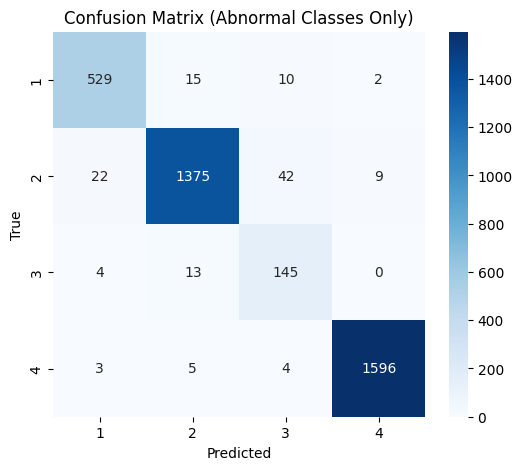

In [ ]:
# ================================
# 8. Evaluate model
# ================================
y_pred_abnormal = np.argmax(cnn_model.predict(X_test_abnormal_cnn), axis=1)

print("CNN Classifier Report (Abnormal Classes Only):")
print(classification_report(y_test_abnormal, y_pred_abnormal, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test_abnormal, y_pred_abnormal)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(class_mapping.keys()),
            yticklabels=list(class_mapping.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Abnormal Classes Only)")
plt.show()


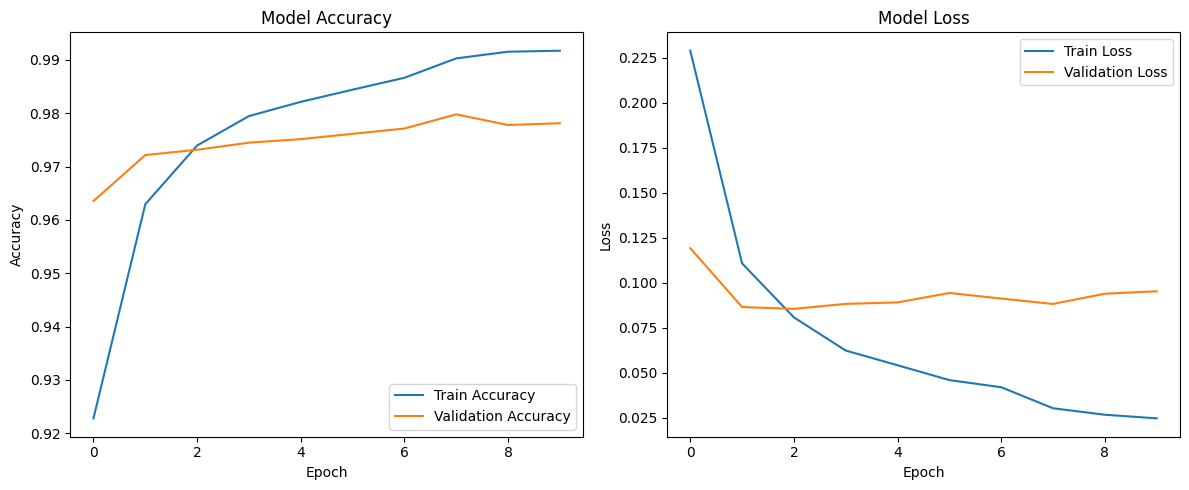

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import classification_report


# Reshape data for CNN (add a channel dimension)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(5, activation='softmax') # 5 classes for the output
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,     # balance between 3 and 5
    min_lr=1e-5,    # allow smaller LR than 1e-4 if needed
    verbose=1
)

early_stopping_cnn = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train_resampled,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_val_cnn, y_val),
                            callbacks=[early_stopping_cnn, reduce_lr],
                            class_weight=class_weight_dict)

# Make predictions on the test set
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Evaluate the model
print("Convolutional Neural Network Classifier Report:")
print(classification_report(y_test, y_pred_cnn_classes))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 145s 42ms/step - accuracy: 0.7987 - loss: 0.5597 - val_accuracy: 0.8799 - val_loss: 0.3215 - learning_rate: 0.0010
Epoch 2/10
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 198s 40ms/step - accuracy: 0.9113 - loss: 0.2380 - val_accuracy: 0.8909 - val_loss: 0.2957 - learning_rate: 0.0010
Epoch 3/10
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 142s 42ms/step - accuracy: 0.9335 - loss: 0.1781 - val_accuracy: 0.9342 - val_loss: 0.1790 - learning_rate: 0.0010
Epoch 4/10
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 196s 40ms/step - accuracy: 0.9439 - loss: 0.1503 - val_accuracy: 0.9458 - val_loss: 0.1505 - learning_rate: 0.0010
Epoch 5/10
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 144s 41ms/step - accuracy: 0.9527 - loss: 0.1289 - val_accuracy: 0.9572 - val_loss: 0.1214 - learning_rate: 0.0010
Epoch 6/10
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 140s 40ms/step - accuracy: 0.9566 - loss: 0.1154 - val_accuracy: 0.9483 - val_loss: 0.1399 - learning_rate: 0.0010
Epoch 7/10
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 143s 40ms/step -